In [1]:
# imports : random, time, math, sys, plt, graphviz

from helpers import *
from gen_laws import *

In [2]:
def genSkeleton(x):
    k = poiss(math.exp(x)-1)
    return [non_zero_poiss(x) for i in range(k)]

def random_set_partition_free(x):
    def label(s):
        size = sum(s)
        rand_perm = random_permutation(size)
        return size, [[rand_perm.pop() for i in range(j)] for j in s]

    p = genSkeleton(x)
    return label(p)

def size_of_random_set_partition_free(x):
    k = poiss(math.exp(x)-1)
    return sum([non_zero_poiss(x) for i in range(k)])

def number_of_distinct_parts_of_random_set_partition_free(x):
    k = poiss(math.exp(x)-1)
    size = 0
    distcints = set()
    for _ in range(k):
        s = non_zero_poiss(x)
        size += s
        distcints.add(s)
    return size,len(distcints)

In [3]:
sp = random_set_partition_free(3)
print(sp)

(60, [[50, 57, 40, 35], [11, 9, 44], [5, 30], [25, 52, 59, 56], [36], [16, 27], [6, 7, 34, 41, 54, 53], [1, 47, 13], [21, 39], [33, 24, 46], [12], [60, 31, 58, 55], [42], [10, 26, 37], [20, 23, 43], [38, 19], [29, 45, 32, 28, 49], [17, 4, 48], [8, 2, 3], [18, 14, 51, 15, 22]])


In [4]:
print(number_of_distinct_parts_of_random_set_partition_free(6.5))

(4386, 15)


In [5]:
from collections import defaultdict
def counts_max_and_average2(gen,nb):
    counts = defaultdict(int)
    discard = 0
    for i in range(nb):
        size = gen()
        counts[size] += 1
    m = max(counts.keys())
    l = [0]*(m+1)
    for k,v in counts.items():
        l[k] = v
    return discard, l, m, sum([i*l[i] for i in range(len(l))])/nb

n = 100_000
values = [1.5,2,2.5,3,5]
k = len(values)
l = [0]*k
for i in range(k):
    d, l[i], m, a = counts_max_and_average2(lambda : size_of_random_set_partition_free(values[i]), n)
    print("trop grands = {}, taille max = {}, moyenne des tailles = {}".format(d,m,a))

trop grands = 0, taille max = 32, moyenne des tailles = 6.74046
trop grands = 0, taille max = 53, moyenne des tailles = 14.75942
trop grands = 0, taille max = 84, moyenne des tailles = 30.42568
trop grands = 0, taille max = 136, moyenne des tailles = 60.3805
trop grands = 0, taille max = 1054, moyenne des tailles = 741.58168


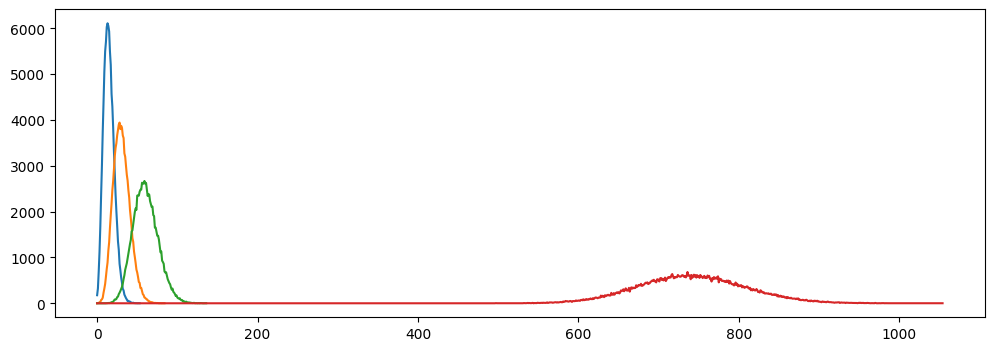

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

for i in range(1,k):
    plt.plot(l[i])
plt.show()

In [7]:
from collections import defaultdict

nb = 10_000
counts = defaultdict(int)
distincts = defaultdict(int)
discard = 0
for val in [1,1.5,2,2.5,3,3.5,4,4.5,4.7,5]:
    for i in range(nb):
        size,d = number_of_distinct_parts_of_random_set_partition_free(val)
        counts[size] += 1
        distincts[size] += d
m = max(counts.keys())
l = [0]*(m+1)
for k,v in counts.items():
    l[k] = distincts[k]/v

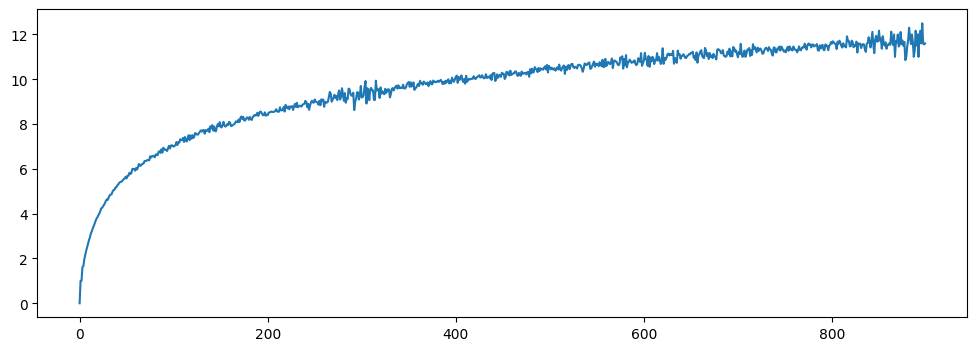

In [8]:
plt.rcParams['figure.figsize'] = [12, 4]

plt.plot(l[:900])
plt.show()

In [9]:
from collections import defaultdict

nb = 1_000_000
counts = defaultdict(int)
distincts = defaultdict(int)
discard = 0
val = .9
inc = (6.5-val)/nb
for i in range(nb):
    size,d = number_of_distinct_parts_of_random_set_partition_free(val)
    counts[size] += 1
    distincts[size] += d
    val+=inc
m = max(counts.keys())
l = [0]*(m+1)
for k,v in counts.items():
    l[k] = distincts[k]/v

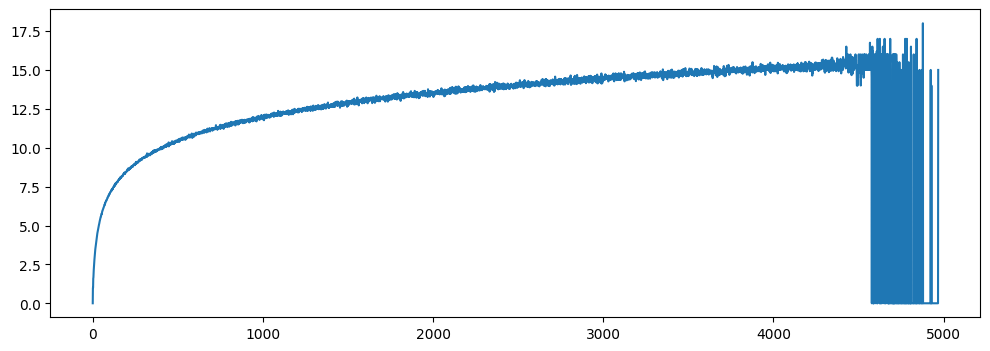

In [10]:
plt.rcParams['figure.figsize'] = [12, 4]

plt.plot(l)
plt.show()